## Install concordex

In [1]:
# !pip install anndata
# !pip3 install scanpy
!pip3 install concordex

In [2]:
# Import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import scanpy as sc
import anndata

from concordex.tools import calculate_concordex

import session_info

## Load dataset

For this demonstration of the nonspatial applications of concordex, we will be using the processed [PBMC dataset](https://www.10xgenomics.com/datasets/fresh-68-k-pbm-cs-donor-a-1-standard-1-1-0) from 10x Genomics. This dataset is available using the `scanpy.datasets` interface. 

In [3]:
ad = sc.datasets.pbmc68k_reduced()

## Compute `concordex`

`concordex` computes a Neighborhood Consolidation Matrix (NBC) that quantifies the proportion of a given cell's neighbors sharing a specific label. This matrix helps capture the local structure of cell populations, reflecting how often cells with similar transcriptomic profiles are assigned the same discrete label. For this analysis, we will used the first 50 PCs to compute the k-nearest neighbor graph. The nodes of this graph will be colored by the cluster assignments derived from the Louvain community detection algorithm. 

The `compute_similarity=True` keyword argument summarizes the NBC into a cluster-by-cluster matrix.  In this matrix, each entry reflects the average proportion of neighbors within a given cluster that share the same label. This provides a high-level view of the local similarity between cells across different clusters, revealing how homogenous or heterogeneous the neighborhoods are within each cluster. The similarity matrix provides a more intuitive understanding of the relationships between clusters based on their shared neighborhood structure.

In [4]:
# Update `ad` in place
calculate_concordex(
    ad,
    'louvain', 
    n_neighbors=30,
    use_rep="X_pca",
    compute_similarity=True
)

The NBC is added to `ad.obsm['nbc']` and the similarity information can be found in `ad.uns['nbc_params']['similarity']`

In [5]:
ad

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'index_neighbors', 'nbc_params'
    obsm: 'X_pca', 'X_umap', 'index', 'nbc'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

We can plot the similarity matrix simply. For evaluating cluster assignments, we would expect that cell neighborhoods tend to be homogenous. That is, more often than not, a cell and its neighbors will have the same label.

In [6]:
sim = ad.uns['nbc_params']['similarity']

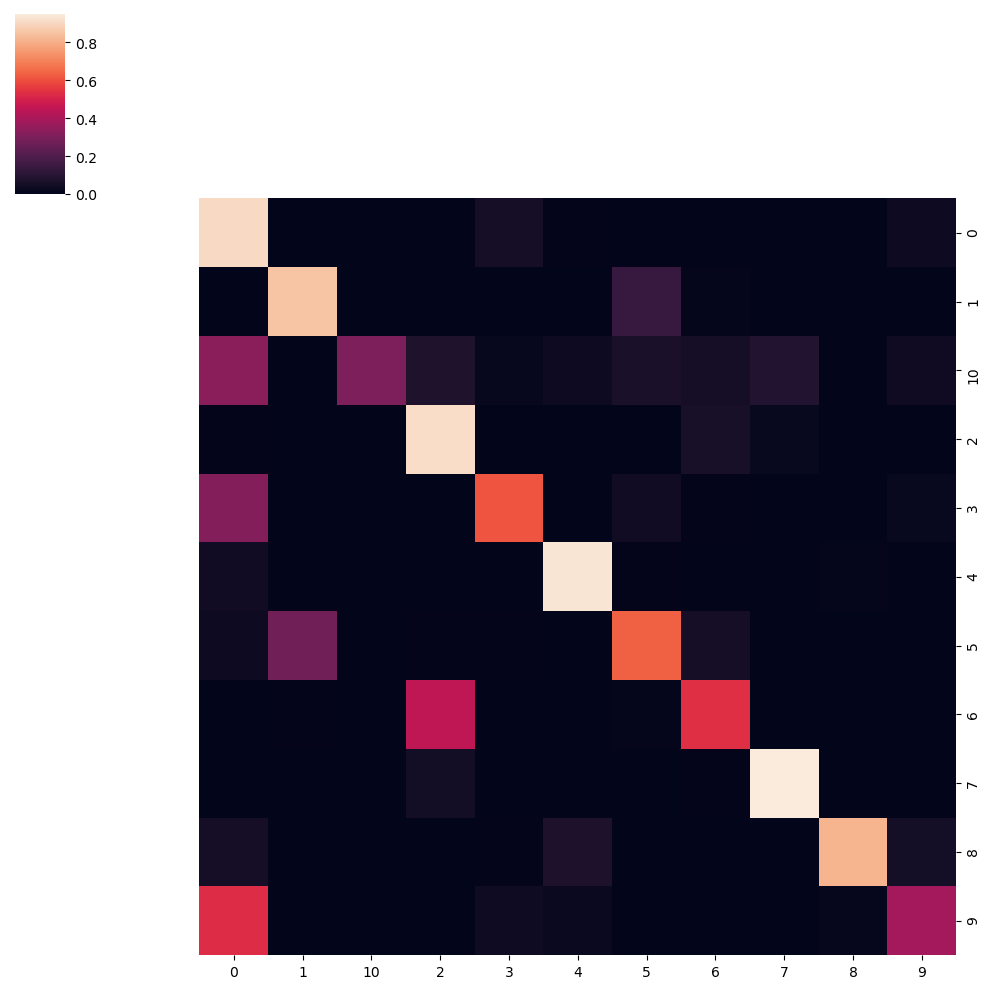

In [7]:
# Make sure axes are properly labeled
axlabs = ad.uns['nbc_params']['labelorder']
cg = cg = sns.clustermap(
    sim,
    row_cluster=False,
    col_cluster=False,
    xticklabels=axlabs, yticklabels=axlabs
)

In [8]:
session_info.show()